In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vote_df = pd.read_csv("train_votes.csv")

In [3]:
np.shape(vote_df)

(330045, 7)

In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


### Since the memory usage is quite high, let us change the Dtype so that the memory consumption decreases and speed increases

In [5]:
vote_df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [6]:
vote_df = vote_df.drop(['ID','Username'],axis=1)

### Given that all the values are positive, they can be converted to a unsigned integers to accomodate the range

In [7]:
vote_df[['Reputation','Answers','Views','Upvotes']] = vote_df[['Reputation','Answers','Views','Upvotes']].astype('uint32')

In [8]:
vote_df.describe()

,Reputation,Answers,Views,Upvotes
count,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,5.231058e+06,615278.000000


In [9]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Tag         330045 non-null  object
 1   Reputation  330045 non-null  uint32
 2   Answers     330045 non-null  uint32
 3   Views       330045 non-null  uint32
 4   Upvotes     330045 non-null  uint32
dtypes: object(1), uint32(4)
memory usage: 7.6+ MB


### It can be seen that there has been an 9MB decrease in size

#### Exploring the dataset

In [10]:
vote_df['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

Text(0.5, 1.0, 'Distribution of question tags')

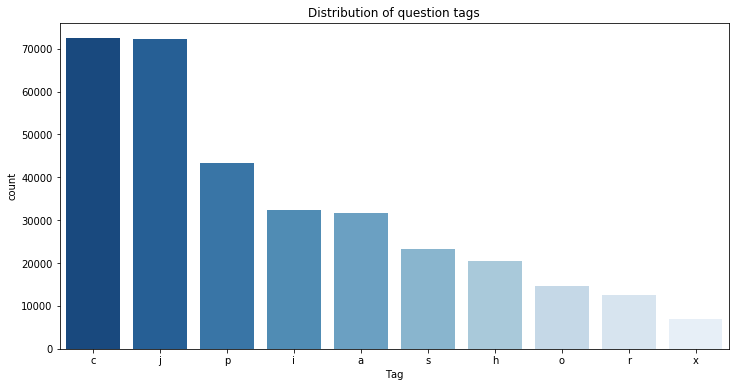

In [11]:
f,ax = plt.subplots(figsize=(12,6))
sns.countplot(x='Tag',data=vote_df,palette="Blues_r",order=vote_df['Tag'].value_counts().index)
plt.title("Distribution of question tags")

- We can observe that question types belonging to c and j tags are much frequently posed than the rest

### Exploring reputation

In [12]:
vote_df['Reputation'].describe()

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

Text(0.5, 1.0, 'Exploring Reputation scores')

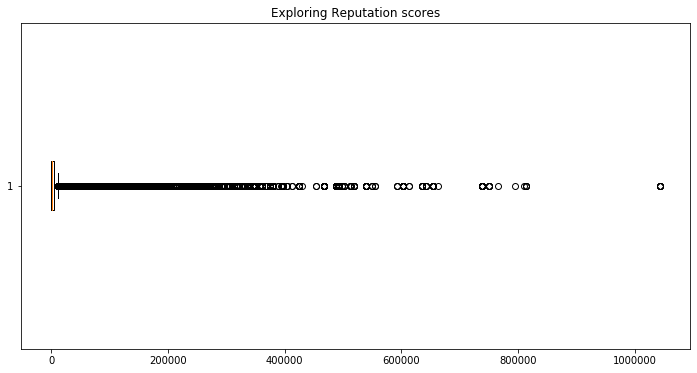

In [13]:
plt.figure(figsize=(12,6))
plt.boxplot(x='Reputation',data=vote_df,vert=False)
plt.title("Exploring Reputation scores")

In [14]:
np.shape(vote_df['Reputation'])

(330045,)

(array([1.54984e+05, 4.18250e+04, 2.40020e+04, 1.59550e+04, 1.16740e+04,
        9.43500e+03, 7.73600e+03, 5.66300e+03, 5.62400e+03, 4.14800e+03,
        3.53400e+03, 2.93900e+03, 2.78100e+03, 2.77700e+03, 2.09500e+03,
        1.90000e+03, 1.75900e+03, 2.18000e+03, 1.74300e+03, 1.71200e+03,
        1.08300e+03, 1.14900e+03, 8.47000e+02, 9.52000e+02, 8.33000e+02,
        7.59000e+02, 8.15000e+02, 7.58000e+02, 5.70000e+02, 6.27000e+02,
        6.97000e+02, 7.98000e+02, 7.73000e+02, 5.22000e+02, 4.52000e+02,
        3.13000e+02, 3.93000e+02, 3.18000e+02, 3.61000e+02, 5.39000e+02,
        2.79000e+02, 3.38000e+02, 2.27000e+02, 3.65000e+02, 2.85000e+02,
        2.56000e+02, 2.18000e+02, 2.08000e+02, 1.36000e+02, 1.15000e+02,
        3.46000e+02, 2.35000e+02, 2.16000e+02, 4.90000e+02, 1.32000e+02,
        2.05000e+02, 2.29000e+02, 8.60000e+01, 2.11000e+02, 1.37000e+02,
        8.30000e+01, 1.06000e+02, 3.42000e+02, 9.10000e+01, 2.08000e+02,
        9.60000e+01, 1.32000e+02, 7.30000e+01, 1.04

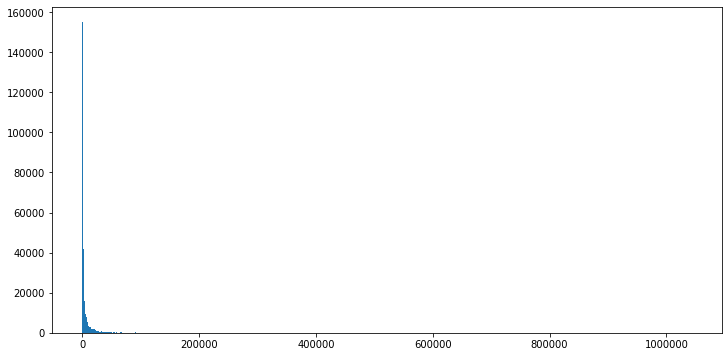

In [15]:
plt.figure(figsize=(12,6))
plt.hist(x=vote_df['Reputation'],bins=1000)

### Considering that reputation plays a vital role in the upvotes, answers and views, let us convert it into the following categories based on their score. This is done because no cogent inferences can be made from the previous graph:
- 0 to 500 = Novice(0)
- 501 to 2500 = Beginner(1)
- 2501 to 5500 = Amateur(2)
- 5501 to 25000 = Professional(3)
- 25001 to 100000 = Expert(4) 
- Value>100000 = Grandmaster(5)

In [16]:
def convert_reputation(reputation_score):
    if 0<=reputation_score<=500:
        return 0
    elif 500<reputation_score<=2500:
        return 1
    elif 2500<reputation_score<=5500:
        return 2
    elif 5500<reputation_score<=25000:
        return 3
    elif 25000<reputation_score<=100000:
        return 4
    elif 100000<reputation_score:
        return 5

In [17]:
vote_df['Reputation'] = pd.Series(list(map(convert_reputation,vote_df['Reputation'])))

In [18]:
vote_df['Reputation'].value_counts()

0    112141
1     95569
3     57026
2     43748
4     17491
5      4070
Name: Reputation, dtype: int64

Text(0.5, 1.0, 'Distribution of reputation')

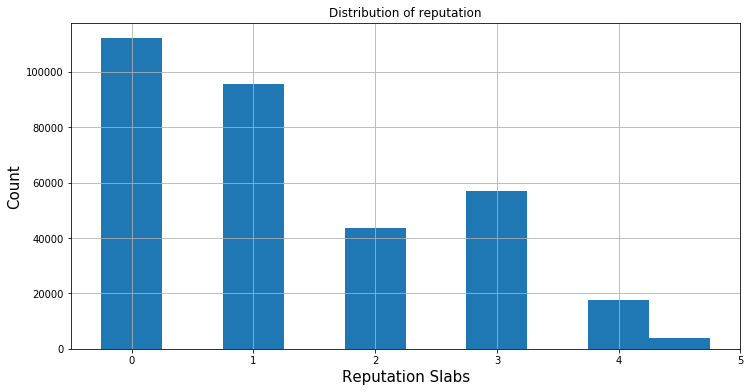

In [19]:
plt.figure(figsize=(12,6))
vote_df['Reputation'].hist(align='left')
plt.xlabel("Reputation Slabs",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution of reputation")

### Denoting each category as a percentage of the total reputation

In [20]:
reputation = np.array(vote_df['Reputation'].value_counts()*100)
reputation = reputation/vote_df['Reputation'].value_counts().sum()

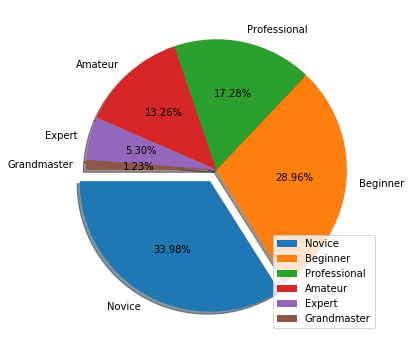

In [21]:
f,ax = plt.subplots(figsize=(12,6))
sizes = reputation
labels = ['Novice','Beginner','Professional','Amateur','Expert','Grandmaster']
explode=[0.1,0,0,0,0,0]
ax.pie(sizes, explode=explode,labels=labels,autopct='%1.2f%%',shadow=True, startangle=180)
plt.legend(loc='lower right')
plt.show()

### Let us check the relation between reputation and views & tag 

Text(0, 0.5, 'Total')

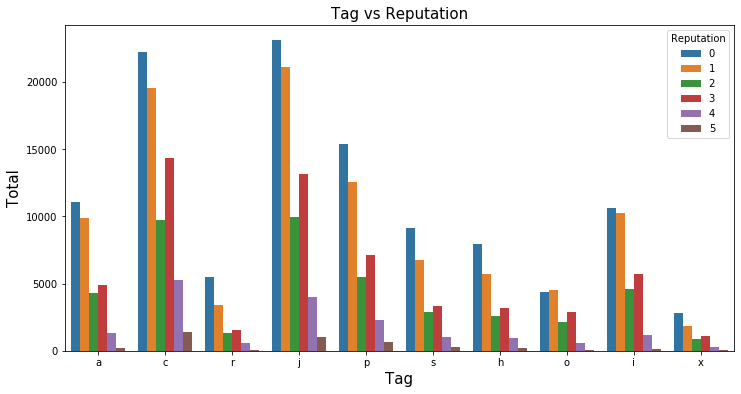

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Tag',hue='Reputation',data=vote_df)
plt.title("Tag vs Reputation",fontsize=15)
plt.xlabel("Tag",fontsize=15)
plt.ylabel("Total",fontsize=15)

### The following can be inferred from this graph:
- Since the number of novices is significantly high, it is natural that they dominate most categories. However, many of them are known to ask questions belonging to c and j.<br>
- Many grandmasters ask questions belonging to tag c and tag j.
- As c and j are significantly higher than the other types of questions, they may indicate questions that are most relevant to the industry or they maybe errors that are occurred mostly frequently. 
- There isn't a clear preference for any person to post questions of a particular category.
- In conclusion, any person, irrespective of reputation equally posts different types of questions.<br>

Text(0, 0.5, 'Views')

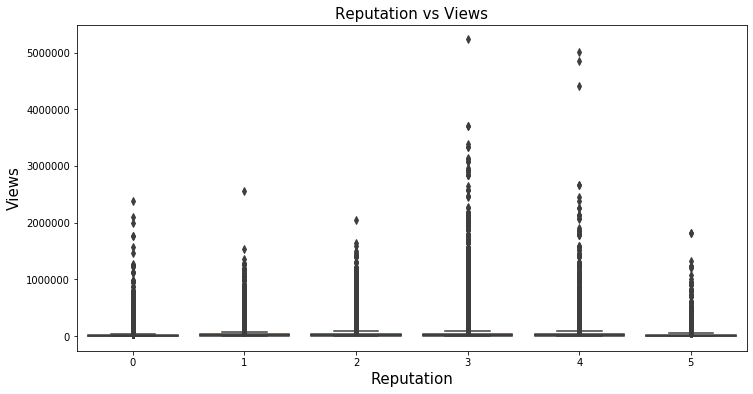

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Reputation',y='Views',data=vote_df)
plt.title("Reputation vs Views",fontsize=15)
plt.xlabel("Reputation",fontsize=15)
plt.ylabel("Views",fontsize=15)

- Normally, it is expected that people with more reputation will have more views but in this case professionals and even novices have more views than grandmasters. This behaviour can be explained by infering that those questions posed by grandmasters require superior understanding of the concept and they are not likely to be searched by novices or beginners etc.
- There is also likely that professionals are in the middle of the categorization and their questions are likely to be viewed by all people.

Text(0, 0.5, 'Upvotes')

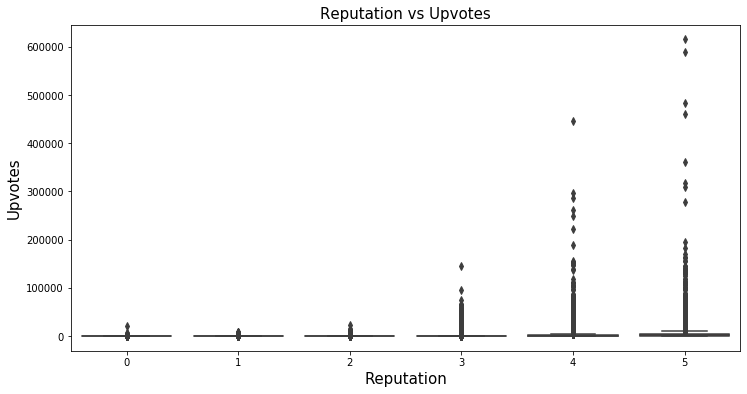

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Reputation',y='Upvotes',data=vote_df)
plt.title("Reputation vs Upvotes",fontsize=15)
plt.xlabel("Reputation",fontsize=15)
plt.ylabel("Upvotes",fontsize=15)

- The observed trend makes a lot of sense because people with higher reputation such as professionals, experts and grandmasters will have their questions answered by people of similar expertise. Since these answers are likely to be correct, they have received higher upvotes

### Exploring Views

In [25]:
vote_df['Views'].describe()

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64

Text(0.5, 1.0, 'Views')

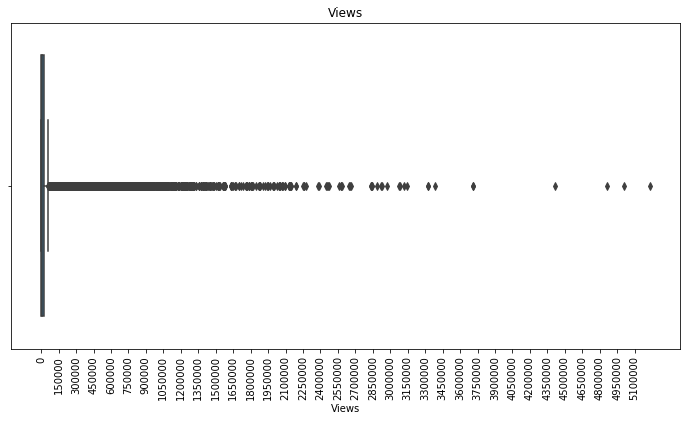

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x=vote_df['Views'])
plt.xticks(np.arange(0,vote_df['Views'].max(),150000),rotation=90)
plt.title("Views")

### Scaling the dataset

In [27]:
vote_df['Upvotes'].value_counts()

3        11474
2        11247
1        10872
4        10778
5         9578
         ...  
10196        1
18566        1
4433         1
6354         1
4435         1
Name: Upvotes, Length: 7239, dtype: int64

In [28]:
vote_df['Upvotes'].describe()

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64

In [29]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer_target = QuantileTransformer(n_quantiles=100)
quantile_transformer_views = QuantileTransformer(n_quantiles=50)

In [30]:
vote_df['Upvotes'] = quantile_transformer_target.fit_transform(np.array(vote_df['Upvotes']).reshape((len(vote_df['Upvotes']),1)))

In [31]:
vote_df['Upvotes'].describe()

count    330045.000000
mean          0.499806
std           0.289183
min           0.000000
25%           0.247475
50%           0.505051
75%           0.750361
max           1.000000
Name: Upvotes, dtype: float64

In [32]:
vote_df['Upvotes'].value_counts()

0.106061    11474
0.070707    11247
0.040404    10872
0.141414    10778
0.171717     9578
            ...  
0.990054        1
0.989906        1
0.990031        1
0.990092        1
0.991456        1
Name: Upvotes, Length: 7231, dtype: int64

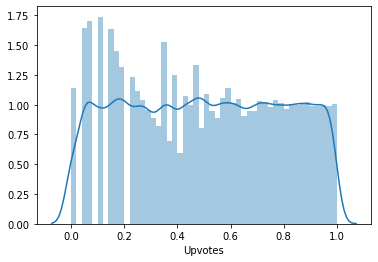

In [33]:
sns.distplot(vote_df['Upvotes'])

In [34]:
vote_df['Views'].value_counts()

87        101
77         99
79         94
74         94
86         92
         ... 
43672       1
55958       1
62099       1
64146       1
524288      1
Name: Views, Length: 82137, dtype: int64

In [35]:
vote_df['Views'] = quantile_transformer_views.fit_transform(np.array(vote_df['Views']).reshape((len(vote_df['Views']),1)))

In [36]:
vote_df['Views'].describe()

count    330045.000000
mean          0.499813
std           0.288462
min           0.000000
25%           0.249958
50%           0.500527
75%           0.749497
max           1.000000
Name: Views, dtype: float64

In [37]:
vote_df['Views'].value_counts()

0.013605    101
0.011861     99
0.011338     94
0.012210     94
0.018489     92
           ... 
0.955805      1
0.929870      1
0.927770      1
0.959281      1
0.980129      1
Name: Views, Length: 82132, dtype: int64

In [38]:
vote_df = vote_df.drop(['Tag'],axis=1)

In [39]:
vote_df.corr('pearson')['Upvotes']

Reputation    0.639708
Answers       0.409644
Views         0.664344
Upvotes       1.000000
Name: Upvotes, dtype: float64

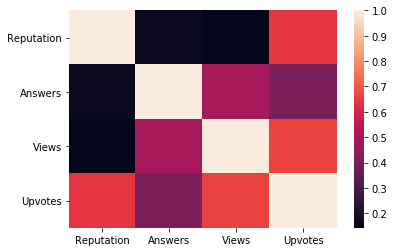

In [40]:
sns.heatmap(vote_df.corr('pearson'))

In [41]:
vote_df_chunk1 = vote_df.loc[0:60000,:]
vote_df_chunk2 = vote_df.loc[60001:120000,:]
vote_df_chunk3 = vote_df.loc[120001:180000,:]
vote_df_chunk4 = vote_df.loc[180001:240000,:]
vote_df_chunk5 = vote_df.loc[240001:300000,:]
vote_df_chunk6 = vote_df.loc[300001:,:]

## Building the regression models
- Multi-variate Linear Regression 
- Decision Tree
- Random Forest 
- XG Boost


In [42]:
def process_data(vote_df_chunk):
    X = vote_df_chunk.drop(['Upvotes'],axis=1)
    Y = vote_df_chunk['Upvotes']
    
    from sklearn.model_selection import train_test_split as tts
    X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=0)
    
    return(X_train,X_test,Y_train,Y_test)

In [43]:
def BuildModel(regressor,X_train,X_test,Y_train,Y_test):
    '''
    This method builds the linear regression model for each chunk of data. The same regressor is used for all chunks.
    '''
    regressor.fit(X_train,Y_train)
    
    #Prediciting the values using the Test Set
    Y_pred = regressor.predict(X_test)
    
    #Performing k-fold cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv=10)
    print("Accuracy = {:.2f}%".format(accuracies.mean()*100))
    
    #Checking the accuracy scores using RMSE
    from sklearn.metrics import mean_squared_error
    rmse_error = mean_squared_error(Y_test,Y_pred)
    print("RMSE Error: ",rmse_error)

In [44]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk1)

### Building a Linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [46]:
BuildModel(linear_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 74.66%
RMSE Error:  0.020900407735368894


### Building a decision tree model

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)

In [48]:
BuildModel(tree,X_train,X_test,Y_train,Y_test)

Accuracy = 55.80%
RMSE Error:  0.0353720445743157


### Tuning the decision tree

In [49]:
pruned_tree = DecisionTreeRegressor(max_depth=7,min_samples_split=7,min_samples_leaf=20,random_state=0)

In [50]:
BuildModel(pruned_tree,X_train,X_test,Y_train,Y_test)

Accuracy = 77.40%
RMSE Error:  0.01846986456050145


### Building a random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=50,random_state=0)

In [52]:
BuildModel(rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 70.77%
RMSE Error:  0.02381747906448621


### Tuning the random forest 

In [95]:
pruned_rf_regressor = RandomForestRegressor(n_estimators=70,max_depth=7,min_samples_split=5,min_samples_leaf=10,random_state=1)

In [96]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 78.34%
RMSE Error:  0.01884806266155099


### Building an XGB model

In [55]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

In [56]:
BuildModel(xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.11%
RMSE Error:  0.018564569169483843


### Tuning the XGB Model

In [139]:
tuned_xgb_regressor = XGBRegressor(n_estimators=35,learning_rate=0.2,colsample_bytree = 0.85,subsample = 0.9,max_depth=5,alpha=0.8,scale_pos_weight=0.8,seed=10)

In [140]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 78.30%
RMSE Error:  0.019062446161398645


- Considering that the random forest and xgboost regressors have performed the best, these regressors will be used for further chunks

## Processing the second chunk and repeating this process

In [143]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk2)

In [144]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.39%
RMSE Error:  0.018257191525858908


In [145]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.14%
RMSE Error:  0.018259311875137654


## Processing the third chunk and repeating this process

In [146]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk3)

In [147]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.86%
RMSE Error:  0.01824560860823932


In [148]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.61%
RMSE Error:  0.018273884030291558


## Processing the fourth chunk and repeating this process

In [149]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk4)

In [150]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.40%
RMSE Error:  0.018753735551058866


In [151]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.12%
RMSE Error:  0.01876252013309257


## Processing the fifth chunk and repeating this process

In [152]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk5)

In [153]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.74%
RMSE Error:  0.018841723418468098


In [154]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 77.45%
RMSE Error:  0.018865745662182888


## Processing the sixth chunk and repeating this process

In [155]:
X_train,X_test,Y_train,Y_test = process_data(vote_df_chunk6)

In [156]:
BuildModel(pruned_rf_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 78.34%
RMSE Error:  0.01884806266155099


In [157]:
BuildModel(tuned_xgb_regressor,X_train,X_test,Y_train,Y_test)

Accuracy = 78.30%
RMSE Error:  0.019062446161398645


### Loading the test set and predicting the values for them

In [178]:
vote_df_test = pd.read_csv("test_votes.csv")

In [179]:
vote_df_test.head(10)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
5,3514,c,3252.0,1.0,115109,2307.0
6,331420,x,859.0,1.0,88355,6507.0
7,406540,c,770.0,4.0,74489,57775.0
8,227379,s,8727.0,2.0,37904,4459.0
9,331687,p,170.0,4.0,162810,4899.0


In [180]:
vote_df_test['Reputation'] = pd.Series(list(map(convert_reputation,vote_df_test['Reputation'])))

In [181]:
vote_df_test = vote_df_test.drop(['ID','Username','Tag'],axis=1)

In [182]:
vote_df_test['Views'] = quantile_transformer_views.fit_transform(np.array(vote_df_test['Views']).reshape((len(vote_df_test['Views']),1)))

### Making the predictions

In [183]:
Y_pred_rf = pruned_rf_regressor.predict(vote_df_test)

In [184]:
Y_pred_rf = quantile_transformer_target.inverse_transform(np.array(Y_pred_rf).reshape((len(Y_pred_rf),1)))

In [185]:
Y_pred_rf = pd.Series(Y_pred_rf.flatten())

In [193]:
Y_pred_rf

0         360.449932
1          38.325367
2          35.681906
3          15.879588
4         245.932999
             ...    
141443     15.109141
141444    202.481378
141445     26.236996
141446     10.000000
141447     23.253732
Length: 141448, dtype: float64

In [186]:
Y_pred_xgb = tuned_xgb_regressor.predict(vote_df_test)

In [187]:
Y_pred_xgb = quantile_transformer_target.inverse_transform(np.array(Y_pred_xgb).reshape((len(Y_pred_xgb),1)))

In [188]:
Y_pred_xgb = pd.Series(Y_pred_xgb.flatten())

In [191]:
Y_pred_xgb

0         258.965973
1          49.582176
2          34.270733
3          15.728749
4         212.125580
             ...    
141443     17.000000
141444    168.674149
141445     27.716951
141446     10.131500
141447     21.915430
Length: 141448, dtype: float32

In [194]:
vote_df_solution = pd.concat([Y_pred_rf,Y_pred_xgb],axis=1,keys=['Random Forest Upvotes','XGBoost Upvotes'])

In [195]:
vote_df_solution

,Random Forest Upvotes,XGBoost Upvotes
0,360.449932,258.965973
1,38.325367,49.582176
2,35.681906,34.270733
3,15.879588,15.728749
4,245.932999,212.125580
...,...,...
141443,15.109141,17.000000
141444,202.481378,168.674149
141445,26.236996,27.716951
141446,10.000000,10.131500


- In conclusion, there are two models to choose:
    1) Random Forest model and
    2) XGBoost model
- Out of these two, in some chunks Random Forest performs better while in others XGBoost performs better.
- On many occasions both the models almost produce the same values.